In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample

from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as smt

import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

ImportError: No module named xgboost

# Section-A

# What are decision trees? What are the different types of decision trees?

Decision Trees are a statistical/machine learning technique for classification and regression. They are capable of discovering complex interactions between variables and making accurate predictions on new data.

There are many types of decision trees. Most popular decision tree algorithms (ID3, C4.5, CART) work by repeatedly partitioning the input space along the dimensions containing the most information. Different algorithms use different metrics to determine both the variable to partition where to create the partition. Some of the more popular metrics are Gini Impurity and Information Gain. Newer decision tree algorithms like conditional inference trees use permutation tests to assess variable importance.

# What are weak learners?

A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

# As compared to an individual model, are ensemble classifiers always more accurate? If so, why?

In ensemble They are also known to reduce model bias and variance but in individual either one is happen such that bias or variance.It also have the bagging and boosting techniques do's aggreation of different models or stacking of different models give the accurate result

# How do ensemble methods work for regression problems?

In regression there is no hyperparameter tunning and may leads errors and leads to under fitting then its is adjusted by the bagging and boosting techniques.

# Section-b

# Explain how bagging methods work. What are its advantages?

 Averaging methods, the driving principle is to build several estimators independently and then to average / vote  their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
 E.g. Bagging methods, Forests of randomized trees, ...
 
 
 Designed to improve the stability (small change in dataset change the model) and accuracy of classification and regression models

It  reduces variance errors and helps to avoid overfitting

Can be used with any type of machine learning model,  mostly used with Decision Tree

Uses sampling with replacement to generate multiple samples of a given size. Sample may contain repeat data points

For large sample size, sample data is expected to have roughly 63.2% unique data points and the rest being duplicates

For classification bagging is used with voting to decide the class of an input while for regression average or median values are calculate!.
Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. 
Advantages:


It also reduces variance and helps to avoid overfitting.

# Explain how gradient boosting works.

A gradient descent procedure is used to minimize the loss when adding trees. Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.


Gradient boosting involves three elements:

A loss function to be optimized.
A weak learner to make predictions.
An additive model to add weak learners to minimize the loss function.


The loss function used depends on the type of problem being solved.
It must be differentiable, but many standard loss functions are supported and you can define your own.
For example, regression may use a squared error and classification may use logarithmic loss.
A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.



2. Weak Learner
Decision trees are used as the weak learner in gradient boosting.Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and “correct” the residuals in the predictions.Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss.Initially, such as in the case of AdaBoost, very short decision trees were used that only had a single split, called a decision stump. Larger trees can be used generally with 4-to-8 levels.It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.This is to ensure that the learners remain weak, but can still be constructed in a greedy manner

3. Additive Model
Trees are added one at a time, and existing trees in the model are not changed.A gradient descent procedure is used to minimize the loss when adding trees.Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss.Generally this approach is called functional gradient descent or gradient descent with functions.

# Read the glass dataset using pandas. Build a classifier to classify the type of glass using:

In [4]:
col=['id','ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','g']

In [5]:
df=pd.read_csv('glass.data',names=col)

In [6]:
df.shape

(214, 11)

In [7]:
df.columns

Index([u'id', u'ri', u'Na', u'Mg', u'Al', u'Si', u'K', u'Ca', u'Ba', u'Fe',
       u'g'],
      dtype='object')

In [8]:
df.head()

id       ri     Na    Mg    Al     Si     K    Ca   Ba   Fe  g
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0  1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0  1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0  1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0  1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0  1

In [9]:
df.g.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: g, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
id    214 non-null int64
ri    214 non-null float64
Na    214 non-null float64
Mg    214 non-null float64
Al    214 non-null float64
Si    214 non-null float64
K     214 non-null float64
Ca    214 non-null float64
Ba    214 non-null float64
Fe    214 non-null float64
g     214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [11]:
df.isnull().sum()

id    0
ri    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
g     0
dtype: int64

In [12]:
df.drop('id',axis=1,inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
x=df.drop('g',axis=1)
y=df['g']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
x_train['g']=y_train


In [14]:
x_train.head()

ri     Na    Mg    Al     Si     K    Ca    Ba    Fe  g
187  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00  7
174  1.52058  12.85  1.61  2.17  72.18  0.76  9.70  0.24  0.51  5
56   1.51215  12.99  3.47  1.12  72.98  0.62  8.35  0.00  0.31  1
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00  6
55   1.51769  12.45  2.71  1.29  73.70  0.56  9.06  0.00  0.24  1

In [15]:
x_test.head()

ri     Na    Mg    Al     Si     K     Ca    Ba    Fe
108  1.52222  14.43  0.00  1.00  72.67  0.10  11.52  0.00  0.08
206  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11

In [16]:
y_test.head()

108    2
206    7
106    2
107    2
51     1
Name: g, dtype: int64

In [18]:
x_train.to_csv('glass_train.csv',index=0)

In [19]:
x_test.to_csv('glass_test.csv',index=0)

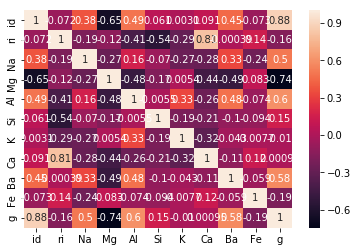

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.corr(),annot=True)
plt.show()

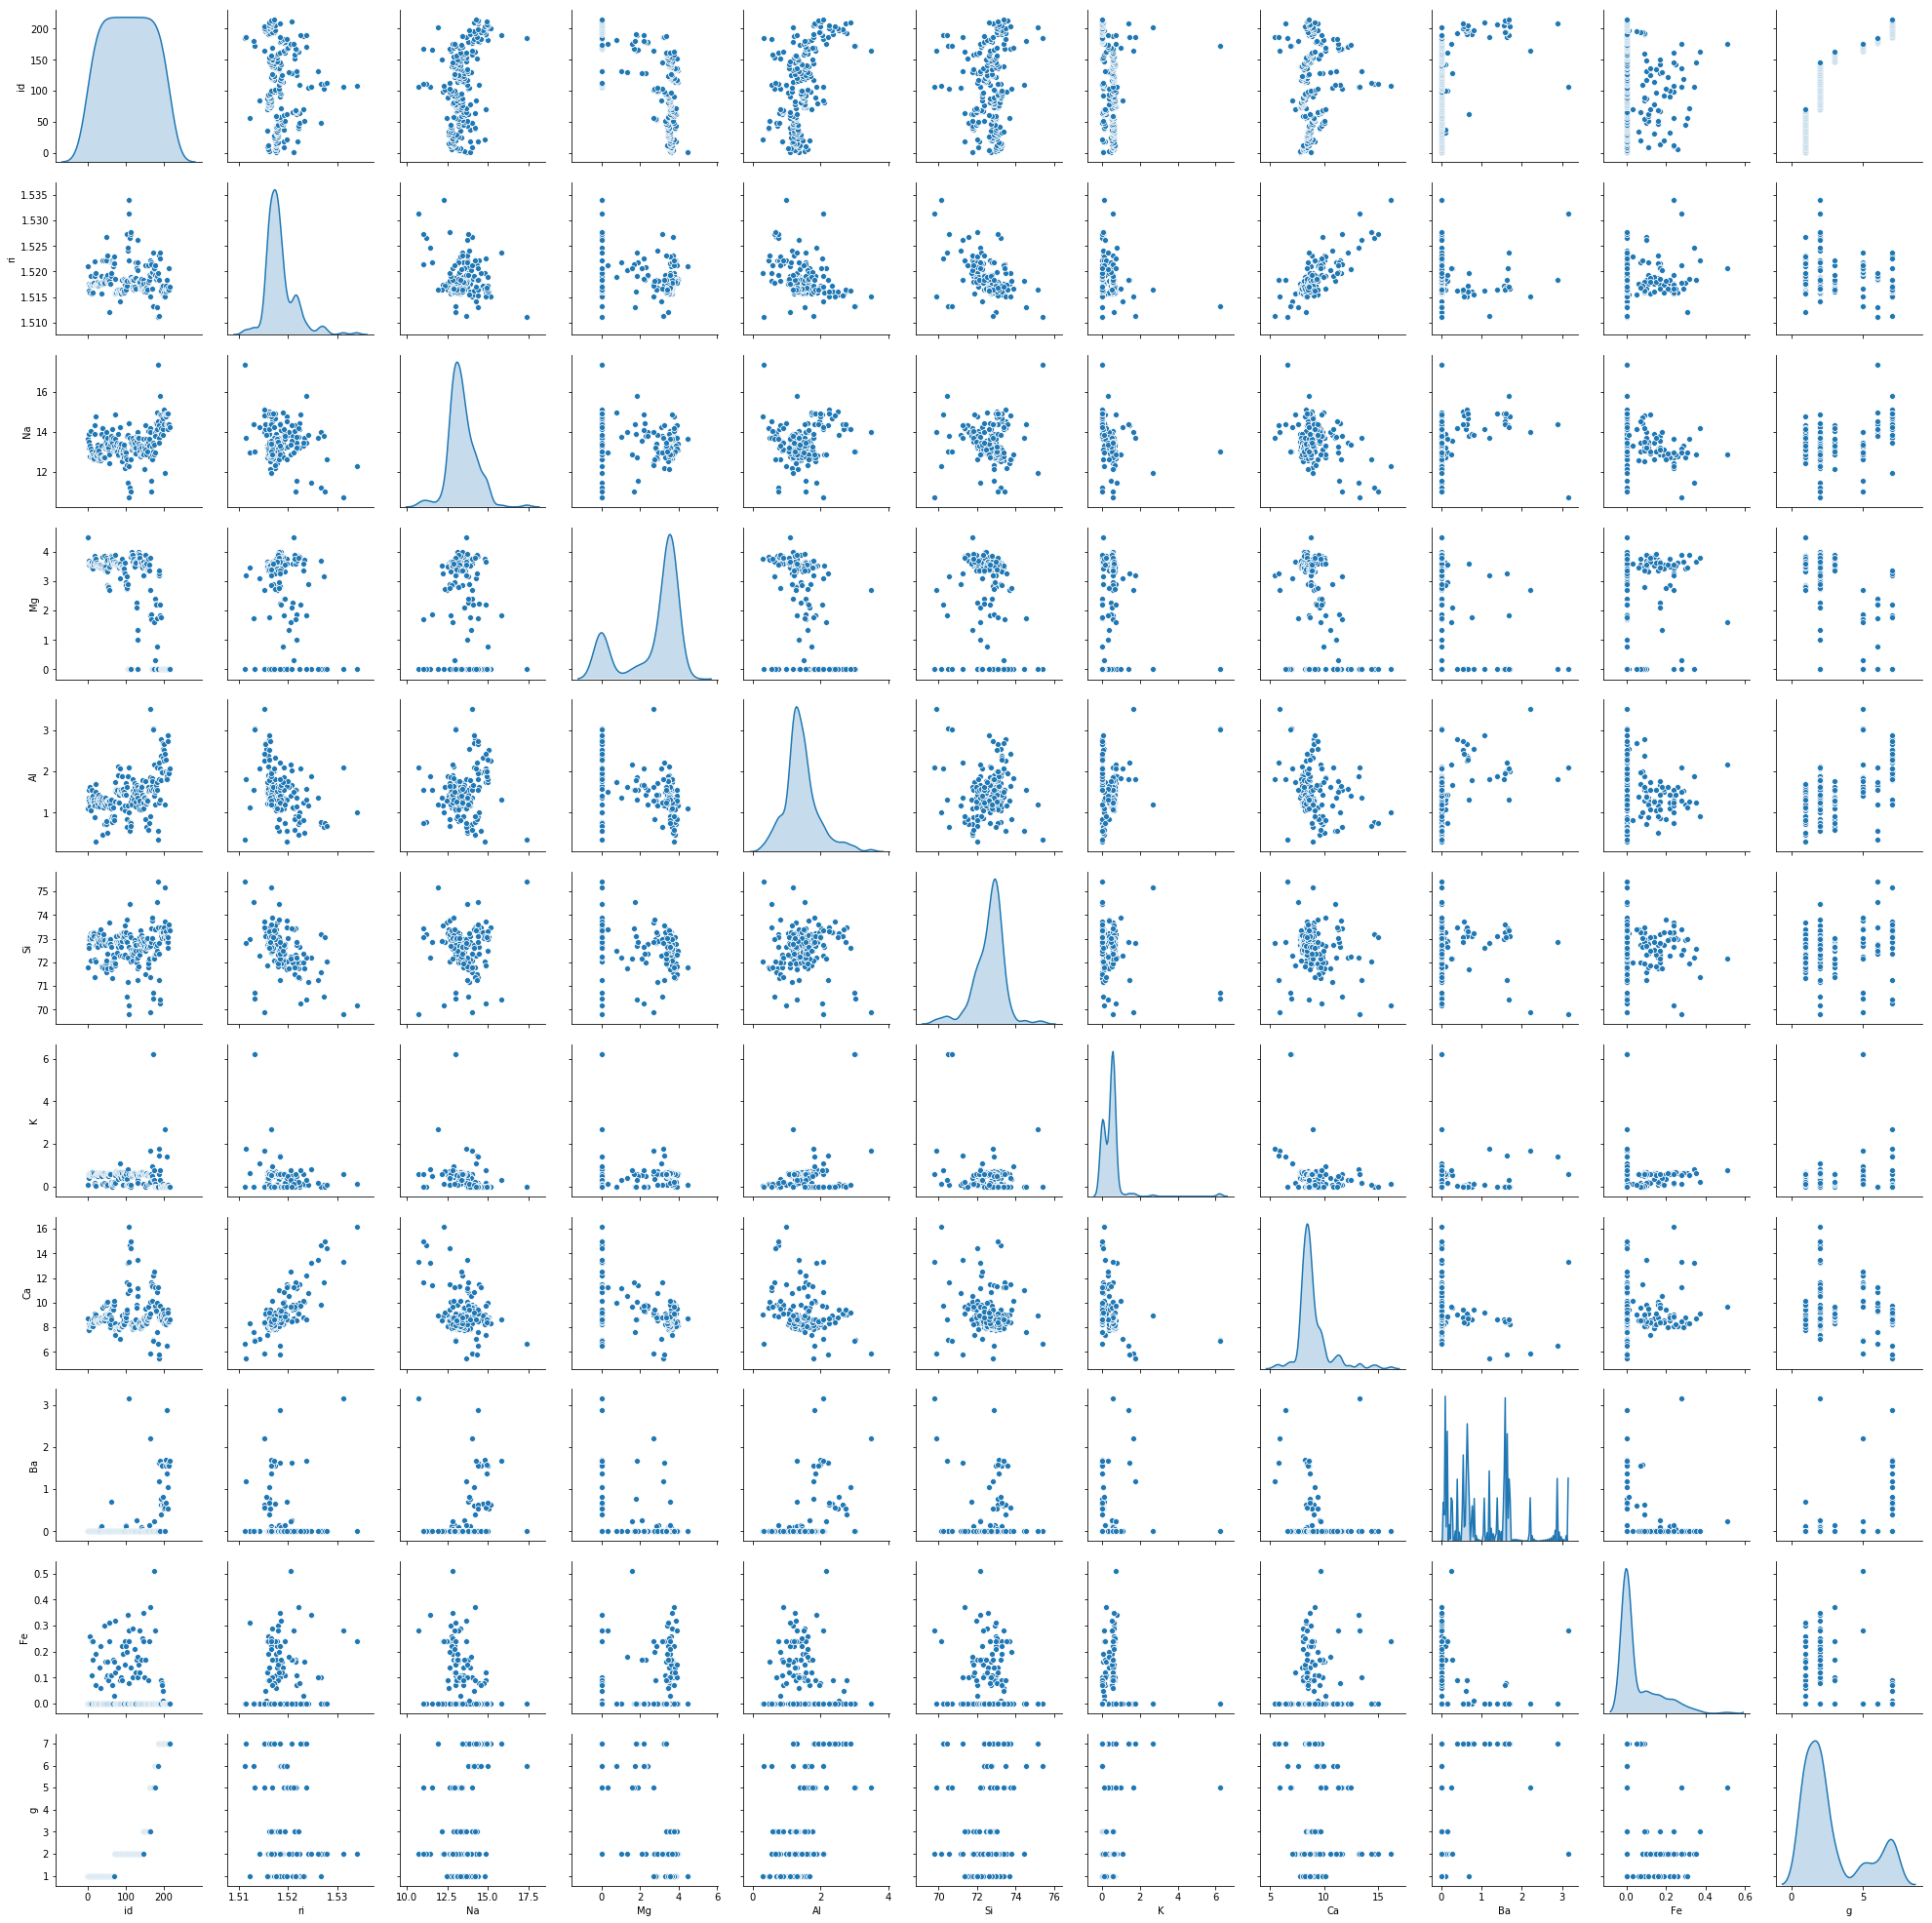

In [47]:
sns.pairplot(df,diag_kind='kde')
plt.show()

# spliting the train and test for Evaluation

In [115]:
from sklearn.model_selection import train_test_split
x=df.drop(['id','g'],axis=1)
y=df['g']




x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=100)

# Scaling or DataTransformation on Independent varaiables

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [117]:
df.g.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: g, dtype: int64

# Random forest

In [118]:
rfcl = RandomForestClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(rfcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 73}

In [119]:
rfcl = RandomForestClassifier(n_estimators=73)
rfcl.fit(x_train, y_train)
print('The accuracy score of predict from test is %1.2f per cent' %((rfcl.score(x_test,y_test)*100)))
print('The accuracy score  of predict from train is %1.2f per cent' %((rfcl.score(x_train,y_train)*100)))

The accuracy score of predict from test is 75.38 per cent
The accuracy score  of predict from train is 100.00 per cent


In [120]:
p=rfcl.predict(x_test)
from sklearn import metrics
print("__________________predict from test data_________________________")
print(metrics.classification_report(p,y_test))

p=rfcl.predict(x_train)
from sklearn import metrics
print("__________________predict from train data_________________________")
print(metrics.classification_report(p,y_train))

__________________predict from test data_________________________
              precision    recall  f1-score   support

           1       0.88      0.75      0.81        20
           2       0.80      0.69      0.74        29
           3       0.33      0.50      0.40         2
           5       0.44      1.00      0.62         4
           6       0.33      1.00      0.50         1
           7       1.00      0.89      0.94         9

   micro avg       0.75      0.75      0.75        65
   macro avg       0.63      0.80      0.67        65
weighted avg       0.81      0.75      0.77        65

__________________predict from train data_________________________
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6

# 2.	Adaboost algorithm

In [121]:
abcl = AdaBoostClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(abcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1}

In [122]:
abcl = AdaBoostClassifier(n_estimators=1)
abcl.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)

In [123]:
print('The accuracy score of predict from test is %1.2f per cent' %((abcl.score(x_test,y_test)*100)))
print('The accuracy score  of predict from train is %1.2f per cent' %((abcl.score(x_train,y_train)*100)))

The accuracy score of predict from test is 38.46 per cent
The accuracy score  of predict from train is 46.98 per cent


In [124]:
p=abcl.predict(x_test)
from sklearn import metrics
print("__________________predict from test data_________________________")
print(metrics.classification_report(p,y_test))

p=abcl.predict(x_train)
from sklearn import metrics
print("__________________predict from train data_________________________")
print(metrics.classification_report(p,y_train))

__________________predict from test data_________________________
              precision    recall  f1-score   support

           1       1.00      0.30      0.47        56
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      0.89      0.94         9

   micro avg       0.38      0.38      0.38        65
   macro avg       0.33      0.20      0.23        65
weighted avg       1.00      0.38      0.53        65

__________________predict from train data_________________________
              precision    recall  f1-score   support

           1       0.98      0.40      0.57       129
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

# 3.	Compare results from both algorithms and comment on their respective accuracy.

# Compare the relative strengths of Bagging vs Boosting. In what situation would one be preferred over the other?

# section-c

# The Climate model simulation crashes dataset contains records of simulation crashes encountered during climate model uncertainty quantification (UQ) ensembles. 

In [2]:
df=pd.read_csv('pop_failures.csv')

In [3]:
df.head()

Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_7  \
0      1    1     0.859036  0.927825  0.252866  0.298838  0.170521  0.735936   
1      1    2     0.606041  0.457728  0.359448  0.306957  0.843331  0.934851   
2      1    3     0.997600  0.373238  0.517399  0.504993  0.618903  0.605571   
3      1    4     0.783408  0.104055  0.197533  0.421837  0.742056  0.490828   
4      1    5     0.406250  0.513199  0.061812  0.635837  0.844798  0.441502   

    ah_corr  ah_bolus   ...     efficiency_factor  tidal_mix_max  \
0  0.428325  0.567947   ...              0.245675       0.104226   
1  0.444572  0.828015   ...              0.616870       0.975786   
2  0.746225  0.195928   ...              0.679355       0.803413   
3  0.005525  0.392123   ...              0.471463       0.597879   
4  0.191926  0.487546   ...              0.551543       0.743877   

   vertical_decay_scale convect_corr bckgrnd_vdc1  bckgrnd_vdc_ban  \
0           0.869090703  0.997518496     0.448620         0.307522   
1           0.914343667  0.845247142     0.864152         0.346713   
2           0.643995161  0.718441133     0.924775         0.315371   
3           0.761658752  0.362750561     0.912819         0.977971   
4           0.312349434  0.650222833     0.522261         0.043545   

   bckgrnd_vdc_eq  bckgrnd_vdc_psim   Prandtl  outcome  
0        0.858310          0.796997  0.869893        0  
1        0.356573          0.438447  0.512256        1  
2        0.250642          0.285636  0.365858        1  
3        0.845921          0.699431  0.475987        1  
4        0.376660          0.280098  0.132283        1  

[5 rows x 21 columns]

In [4]:
df.shape

(540, 21)

In [5]:
df.columns

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale',
       'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl', 'outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
Study                   540 non-null int64
Run                     540 non-null int64
vconst_corr             540 non-null float64
vconst_2                540 non-null float64
vconst_3                540 non-null float64
vconst_4                540 non-null float64
vconst_5                540 non-null float64
vconst_7                540 non-null float64
ah_corr                 540 non-null float64
ah_bolus                540 non-null float64
slm_corr                540 non-null float64
efficiency_factor       540 non-null float64
tidal_mix_max           540 non-null float64
vertical_decay_scale    540 non-null object
convect_corr            540 non-null object
bckgrnd_vdc1            540 non-null float64
bckgrnd_vdc_ban         540 non-null float64
bckgrnd_vdc_eq          540 non-null float64
bckgrnd_vdc_psim        540 non-null float64
Prandtl                 540 non-null float64
o

In [7]:
df['outcome'].value_counts()

1    494
0     46
Name: outcome, dtype: int64

In [8]:
df['vertical_decay_scale'].value_counts()

0.605521502                   1
0.097652566                   1
0.96857307                    1
5        0.290472114071922    1
0.131261461                   1
0.067844535                   1
6        0.630439072839605    1
0.947346732                   1
0.56253868                    1
9         0.77767475437657    1
0.341651771                   1
6        0.966875197218420    1
0.788915681                   1
0.147092405                   1
0.467984427                   1
9        0.613355294790946    1
0.352575783                   1
0.974333948                   1
3        0.035348088273571    1
0.158162295                   1
0.171454447                   1
1        0.897271328081842    1
0.844116317                   1
3       0.0769267117591678    1
5        0.744072881986438    1
0.997718206                   1
4         0.26285366098034    1
0.008734696                   1
0.733015024                   1
0.201377308                   1
                             ..
5       

In [9]:
df['vertical_decay_scale'].dtype

dtype('O')

In [10]:
df['vertical_decay_scale'].head()

0    0.869090703
1    0.914343667
2    0.643995161
3    0.761658752
4    0.312349434
Name: vertical_decay_scale, dtype: object

In [11]:
df['convect_corr'].value_counts()

9      0.6226925373206743    1
0.217746438                  1
9      0.2864625926763337    1
0.156799351                  1
0.26585738                   1
0.29352604                   1
8      0.6800033257627446    1
0.865205794                  1
9      0.5168697951710783    1
0.78995827                   1
0.634461258                  1
0.458621489                  1
0.847728625                  1
0.87864292                   1
0.305013953                  1
0.946543711                  1
0.134349256                  1
0.290866252                  1
3      0.1342452697106637    1
6      0.8402702304560484    1
3      0.9659255282992187    1
4      0.1608132303834686    1
0.40993169                   1
6    0.001312318150626703    1
6      0.5993390962313343    1
0.374270055                  1
4      0.2541584757221345    1
0.855732587                  1
7     0.05265760948079535    1
0.603069616                  1
                            ..
0.673869541                  1
5      0

In [12]:
df1=df.drop(['convect_corr','vertical_decay_scale'],axis=1)

In [13]:
df1.shape

(540, 19)

In [14]:
df1.columns

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban',
       'bckgrnd_vdc_eq', 'bckgrnd_vdc_psim', 'Prandtl', 'outcome'],
      dtype='object')

In [15]:
list(df1.columns)

['Study',
 'Run',
 'vconst_corr',
 'vconst_2',
 'vconst_3',
 'vconst_4',
 'vconst_5',
 'vconst_7',
 'ah_corr',
 'ah_bolus',
 'slm_corr',
 'efficiency_factor',
 'tidal_mix_max',
 'bckgrnd_vdc1',
 'bckgrnd_vdc_ban',
 'bckgrnd_vdc_eq',
 'bckgrnd_vdc_psim',
 'Prandtl',
 'outcome']

In [16]:
x= df1.drop('outcome', axis=1)
y= df1.outcome

In [17]:
x.columns

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban',
       'bckgrnd_vdc_eq', 'bckgrnd_vdc_psim', 'Prandtl'],
      dtype='object')

In [18]:
sm = SMOTE(k_neighbors=5,random_state=1)
x,y =sm.fit_sample(x,y)
x= pd.DataFrame(x, columns=['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban',
       'bckgrnd_vdc_eq', 'bckgrnd_vdc_psim', 'Prandtl'])
y=pd.DataFrame(y, columns=['outcome'])


In [19]:
heartos = pd.concat([x,y],axis=1)
heartos.shape

(988, 19)

In [20]:
heartos.outcome.value_counts() #Now the sample is balanced

1    494
0    494
Name: outcome, dtype: int64

In [21]:
# Split the data in test and train

x= heartos.drop('outcome', axis=1)
y= heartos.outcome

#If standard value is required
sc = StandardScaler()
x_std = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

#If standard value id required
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

# 1.	Use an ensemble classifier to predict the simulation outcomes (fail or succeed). Try a bagging as well as boosting classifier. Which type of model performs better?

# Bagging_classsifier

In [99]:
bgcl = BaggingClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(bgcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 19}

In [100]:
bgcl = BaggingClassifier(n_estimators=19)
bgcl.fit(x_train, y_train)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=19, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [101]:
print('The accuracy score of predict from test is %1.2f per cent' %((bgcl.score(x_test,y_test)*100)))
print('The accuracy score  of predict from train is %1.2f per cent' %((bgcl.score(x_train,y_train)*100)))

The accuracy score of predict from test is 93.60 per cent
The accuracy score  of predict from train is 99.57 per cent


In [102]:
p=bgcl.predict(x_test)
from sklearn import metrics
print("__________________predict from test data_________________________")
print(metrics.classification_report(p,y_test))

p=bgcl.predict(x_train)
from sklearn import metrics
print("__________________predict from train data_________________________")
print(metrics.classification_report(p,y_train))

__________________predict from test data_________________________
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       154
           1       0.94      0.93      0.93       143

   micro avg       0.94      0.94      0.94       297
   macro avg       0.94      0.94      0.94       297
weighted avg       0.94      0.94      0.94       297

__________________predict from train data_________________________
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       342
           1       0.99      1.00      1.00       349

   micro avg       1.00      1.00      1.00       691
   macro avg       1.00      1.00      1.00       691
weighted avg       1.00      1.00      1.00       691



# Boosting_classifier

In [103]:
xgcl = xgb.XGBClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(xgcl, param_distributions=param, n_iter=80)
randomCV.fit(x,y)
randomCV.best_params_

C:\Users\pokas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 3}

In [104]:
xgcl = xgb.XGBClassifier(n_estimators=3)
xgcl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [105]:
print('The accuracy score of predict from test is %1.2f per cent' %((xgcl.score(x_test,y_test)*100)))
print('The accuracy score  of predict from train is %1.2f per cent' %((xgcl.score(x_train,y_train)*100)))

The accuracy score of predict from test is 87.88 per cent
The accuracy score  of predict from train is 92.62 per cent


In [106]:
p=xgcl.predict(x_test)
from sklearn import metrics
print("__________________predict from test data_________________________")
print(metrics.classification_report(p,y_test))

p=xgcl.predict(x_train)
from sklearn import metrics
print("__________________predict from train data_________________________")
print(metrics.classification_report(p,y_train))

__________________predict from test data_________________________
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       163
           1       0.85      0.90      0.87       134

   micro avg       0.88      0.88      0.88       297
   macro avg       0.88      0.88      0.88       297
weighted avg       0.88      0.88      0.88       297

__________________predict from train data_________________________
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       372
           1       0.88      0.97      0.92       319

   micro avg       0.93      0.93      0.93       691
   macro avg       0.93      0.93      0.93       691
weighted avg       0.93      0.93      0.93       691



# 2.	What are the most important factors affecting simulation crashes in climate model?

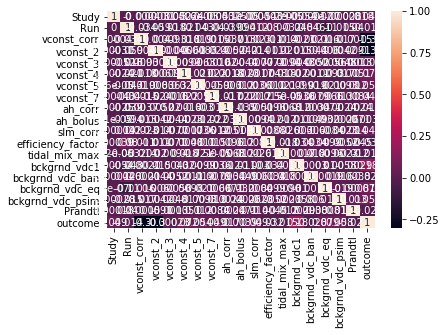

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df1.corr(),annot=True)
plt.show()

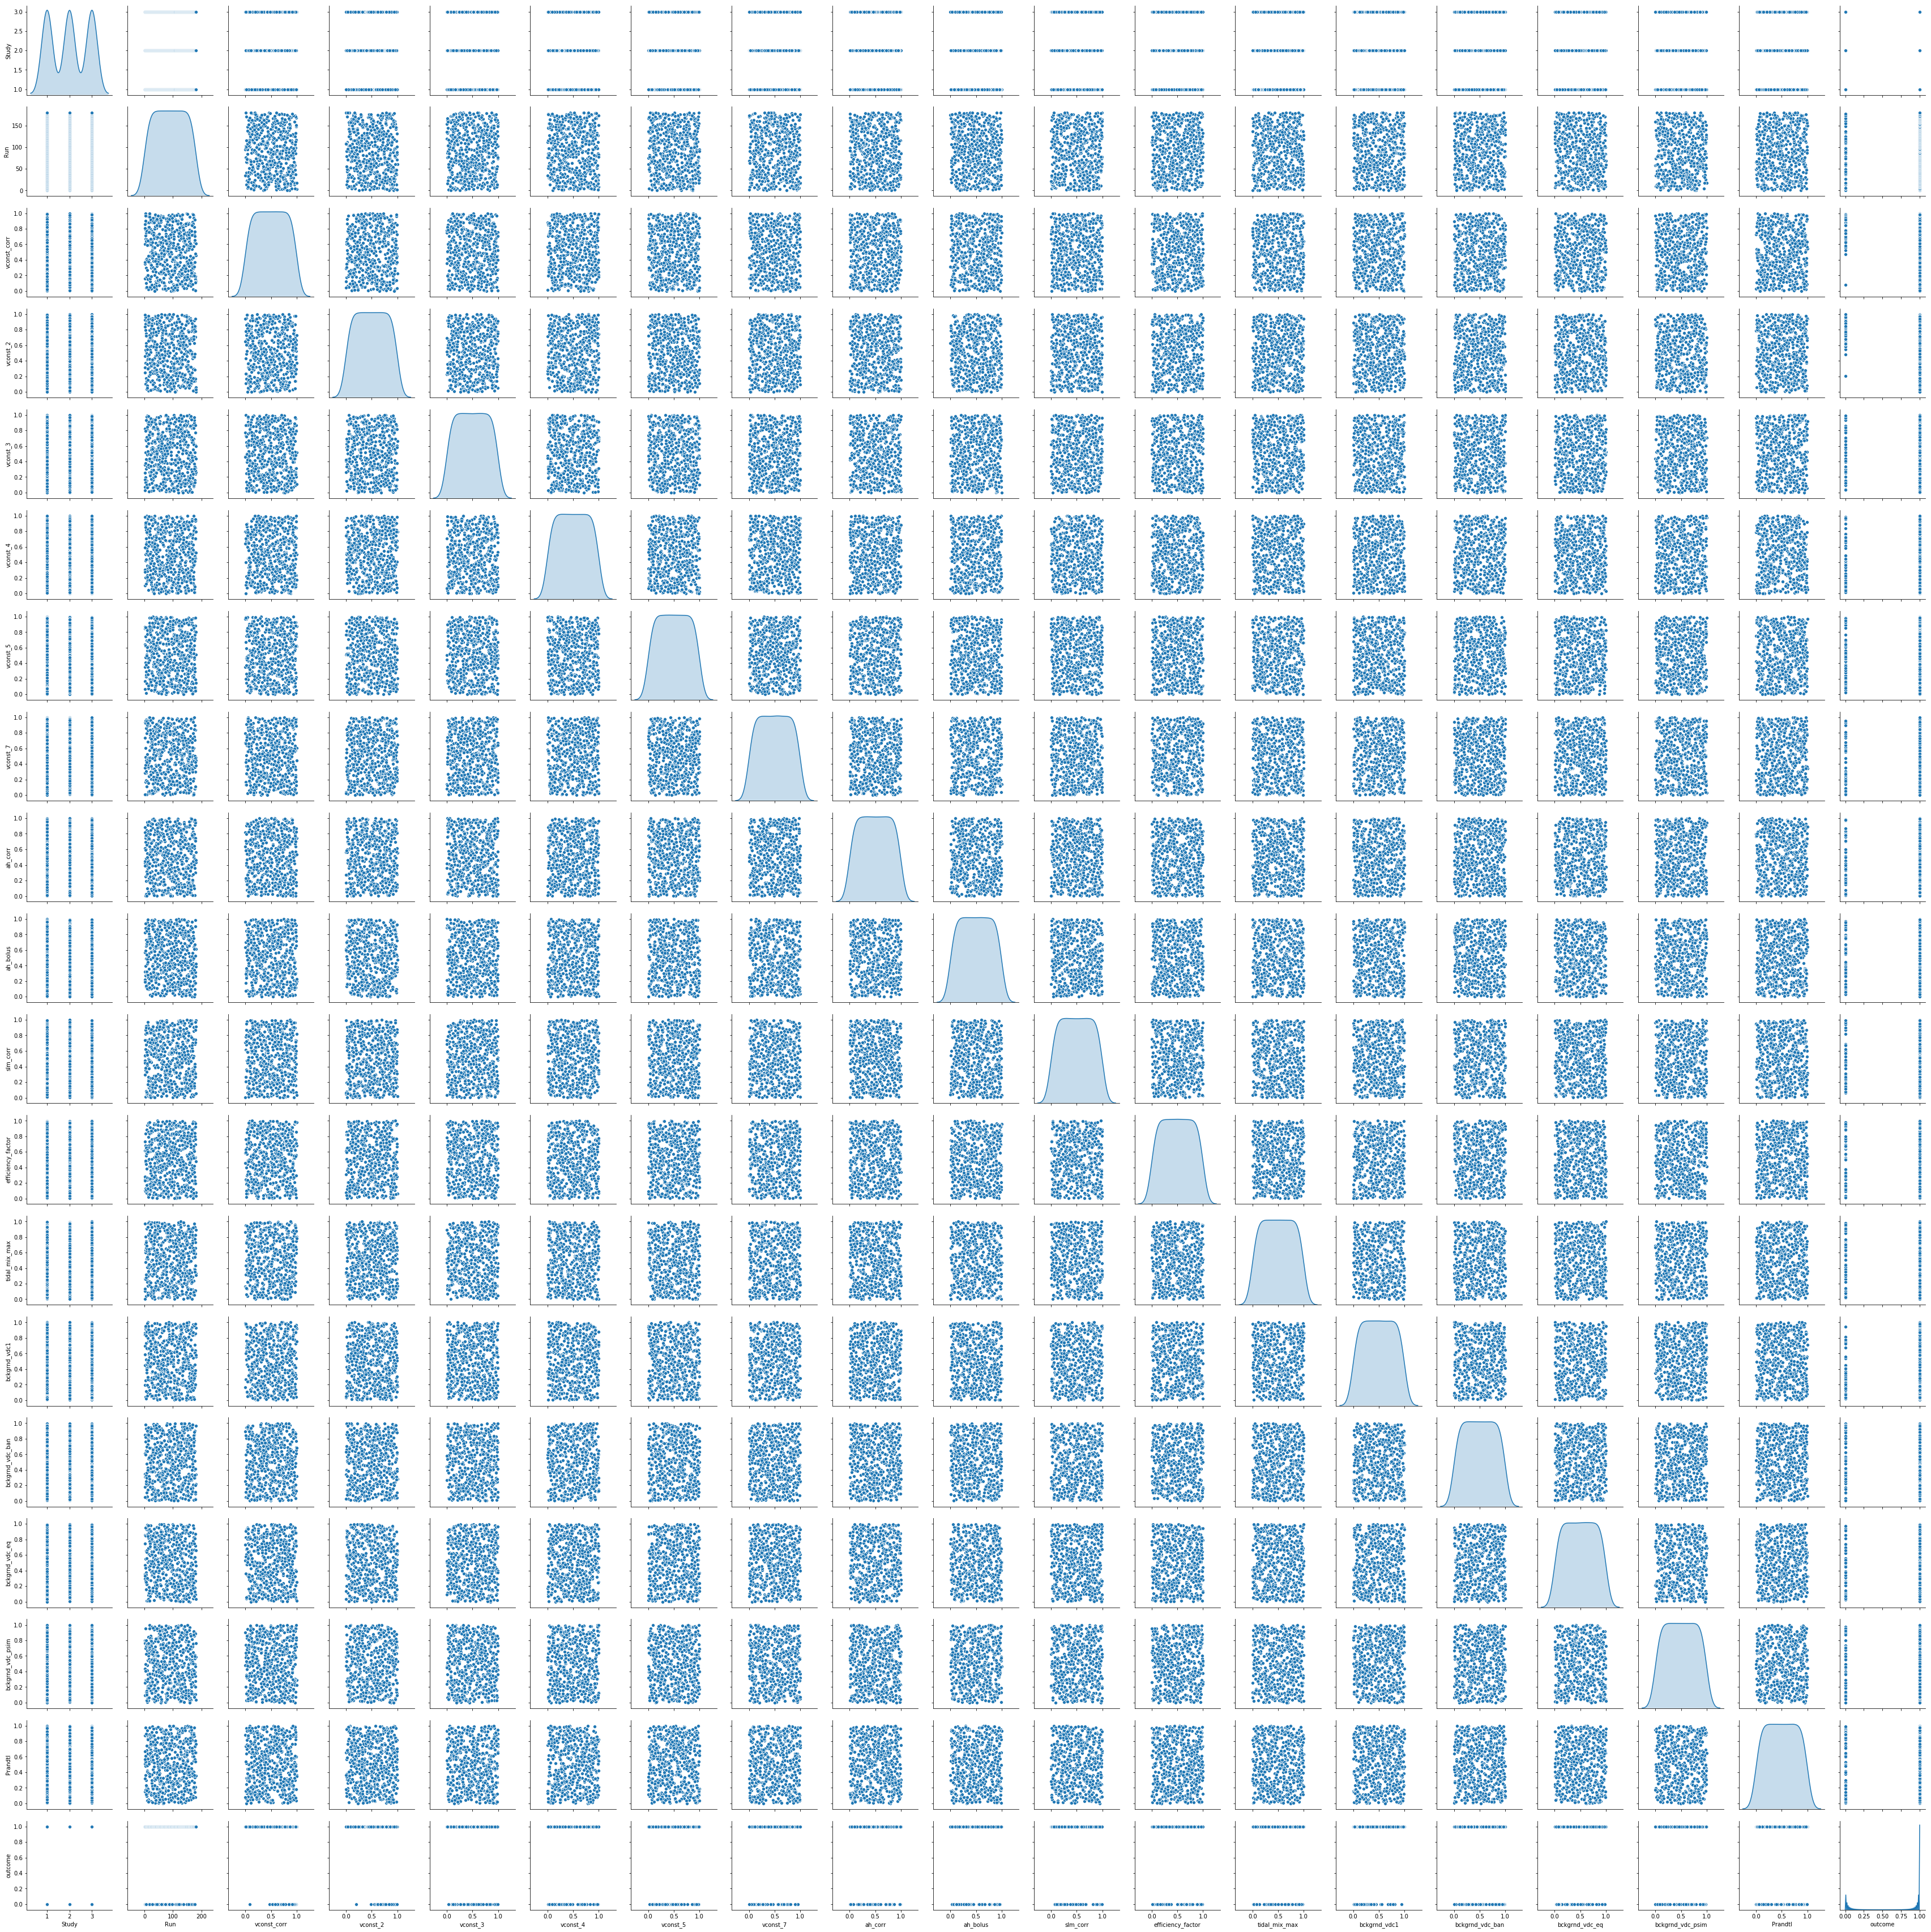

In [24]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

VIF Factor           features
0          7.3              Study
1          4.5                Run
2          6.5        vconst_corr
3          6.7           vconst_2
4          4.4           vconst_3
5          4.0           vconst_4
6          4.2           vconst_5
7          4.2           vconst_7
8          4.4            ah_corr
9          4.3           ah_bolus
10         4.4           slm_corr
11         4.7  efficiency_factor
12         4.4      tidal_mix_max
13         3.5       bckgrnd_vdc1
14         5.2    bckgrnd_vdc_ban
15         4.0     bckgrnd_vdc_eq
16         4.1   bckgrnd_vdc_psim
17         4.4            Prandtl